In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('american_bankruptcy.csv')

In [5]:
df.head(5)

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [6]:
df.rename(columns={
    "name": "company_name",
    "status_label": "status_label",
    "year": "year",
    "X1": "Current_Assets",
    "X2": "Cost_of_Goods_Sold",
    "X3": "Depreciation_Amortization",
    "X4": "EBITDA",
    "X5": "Inventory",
    "X6": "Net_Income",
    "X7": "Total_Receivables",
    "X8": "Market_Value",
    "X9": "Net_Sales",
    "X10": "Total_Assets",
    "X11": "Long_Term_Debt",
    "X12": "EBIT",
    "X13": "Gross_Profit",
    "X14": "Current_Liabilities",
    "X15": "Retained_Earnings",
    "X16": "Total_Revenue",
    "X17": "Total_Liabilities",
    "X18": "Operating_Expenses"
}, inplace=True)

In [7]:
df.head(3)

,company_name,status_label,year,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,...,Net_Sales,Total_Assets,Long_Term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514


##  Financial Variables — X1 to X18

The dataset contains 18 anonymized financial indicators (`X1` to `X18`) describing the situation of each company.  
Based on secondary academic sources and cross-referencing with similar bankruptcy prediction datasets, the following definitions are considered *probable*:

| Variable | Probable Meaning |
|:---------:|:----------------|
| **X1** | Current Assets |
| **X2** | Cost of Goods Sold |
| **X3** | Depreciation and Amortization |
| **X4** | EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization) |
| **X5** | Inventory |
| **X6** | Net Income |
| **X7** | Total Receivables |
| **X8** | Market Value |
| **X9** | Net Sales |
| **X10** | Total Assets |
| **X11** | Long-Term Debt |
| **X12** | EBIT (Earnings Before Interest and Taxes) |
| **X13** | Gross Profit |
| **X14** | Current Liabilities |
| **X15** | Retained Earnings |
| **X16** | Total Revenue |
| **X17** | Total Liabilities |
| **X18** | Operating Expenses |

**Note:**  
 The definitions of variables X1–X18 are derived from *secondary analyses of academic papers* and are considered **probable**.  
 The original author of the dataset did **not publish an official description** of these variables.  
 
 Therefore, these features are treated as **anonymous financial indicators**, yet their definitions provide a **credible economic interpretation** for modeling and discussion purposes — particularly in understanding which financial factors (e.g., liquidity, profitability, leverage) contribute most to bankruptcy risk.


In [36]:

np.random.seed(42)  
df["loan_amount"] = df["Total_Liabilities"] * np.random.uniform(0.1, 0.5, size=len(df))


In [37]:

df["loan_ratio"] = df["loan_amount"] / df["Total_Assets"].replace(0, np.nan)
df["loan_ratio"] = df["loan_ratio"].fillna(0)


In [38]:
df[["loan_amount", "loan_ratio"]].head()

,loan_amount,loan_ratio
0,100.296896,0.135354
1,173.691489,0.247475
2,157.104890,0.221212
3,132.945067,0.193622
4,66.198578,0.093331


In [21]:
y = df["status_label"]
X = df.drop(columns=["status_label"])

In [9]:
df.shape

(78682, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               78682 non-null  object 
 1   status_label               78682 non-null  object 
 2   year                       78682 non-null  int64  
 3   Current_Assets             78682 non-null  float64
 4   Cost_of_Goods_Sold         78682 non-null  float64
 5   Depreciation_Amortization  78682 non-null  float64
 6   EBITDA                     78682 non-null  float64
 7   Inventory                  78682 non-null  float64
 8   Net_Income                 78682 non-null  float64
 9   Total_Receivables          78682 non-null  float64
 10  Market_Value               78682 non-null  float64
 11  Net_Sales                  78682 non-null  float64
 12  Total_Assets               78682 non-null  float64
 13  Long_Term_Debt             78682 non-null  flo

In [11]:
df.isna().sum() 

company_name                 0
status_label                 0
year                         0
Current_Assets               0
Cost_of_Goods_Sold           0
Depreciation_Amortization    0
EBITDA                       0
Inventory                    0
Net_Income                   0
Total_Receivables            0
Market_Value                 0
Net_Sales                    0
Total_Assets                 0
Long_Term_Debt               0
EBIT                         0
Gross_Profit                 0
Current_Liabilities          0
Retained_Earnings            0
Total_Revenue                0
Total_Liabilities            0
Operating_Expenses           0
loan_amount                  0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique().sort_values()

status_label                     2
year                            20
company_name                  8971
loan_amount                  21148
Depreciation_Amortization    36010
Inventory                    38898
Long_Term_Debt               39741
Total_Receivables            49577
Net_Income                   55550
EBIT                         56949
Current_Liabilities          58685
EBITDA                       59060
Total_Liabilities            64640
Gross_Profit                 64952
Cost_of_Goods_Sold           65690
Current_Assets               65895
Net_Sales                    68596
Total_Revenue                68596
Operating_Expenses           70840
Total_Assets                 71521
Retained_Earnings            72062
Market_Value                 77580
dtype: int64

In [24]:
df.drop(columns=["company_name", "year"], inplace=True, errors="ignore")

In [40]:
df 

,status_label,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,Market_Value,Net_Sales,...,Long_Term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses,loan_amount,loan_ratio
0,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,...,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,100.296896,0.135354
1,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,...,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,173.691489,0.247475
2,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,...,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,157.104890,0.221212
3,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,...,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,132.945067,0.193622
4,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,...,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,66.198578,0.093331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,alive,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,...,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,81.933972,0.074546
78678,alive,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,...,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,338.220379,0.181261
78679,alive,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,...,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,139.452621,0.079859
78680,alive,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,...,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,301.442824,0.173631


In [41]:
def process_df_eve(df, target_col="status_label"):
    """
    Simplified preprocessing for the American Bankruptcy dataset.
    - Encodes target variable (alive → 0, failed → 1)
    - Separates features (X) and target (y)
    """

    df = df.copy()

    # Encode target
    if df[target_col].dtype == 'object':
        df[target_col] = df[target_col].map({"alive": 0, "failed": 1})

    # Separate X and y
    y = df[target_col]
    X = df.drop(columns=[target_col])

    return X, y


In [42]:
X, y = process_df_eve(df)

###  Distribution of the Target Variable — `status_label`

The target variable `status_label` represents the financial status of each company:  
- `0` → Alive  
- `1` → Failed (bankrupt)

The distribution is highly imbalanced, with most companies labeled as *Alive* and a smaller portion as *Failed* (around 7%).  


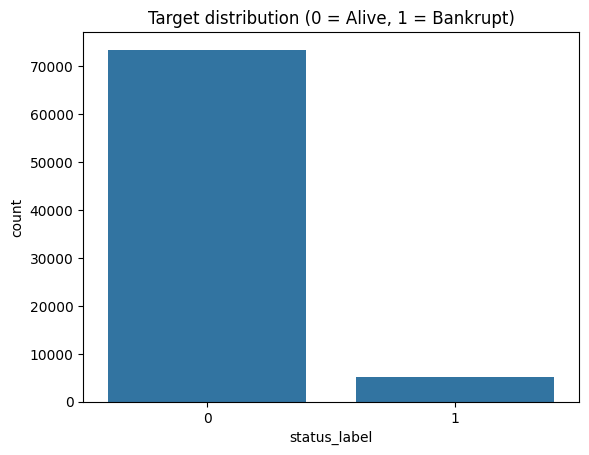

status_label
0    0.933657
1    0.066343
Name: proportion, dtype: float64


In [43]:
sns.countplot(x=y)
plt.title("Target distribution (0 = Alive, 1 = Bankrupt)")
plt.show()

print(y.value_counts(normalize=True))


In [44]:
df["status_label"].value_counts()


status_label
alive     73462
failed     5220
Name: count, dtype: int64

## Correlation Analysis Summary — Financial Ratios vs Bankruptcy Risk


###  Step 1 — Correlation Between Financial Variables (Features Only)
>  Purpose: ensure data quality and detect redundant variables before modeling.


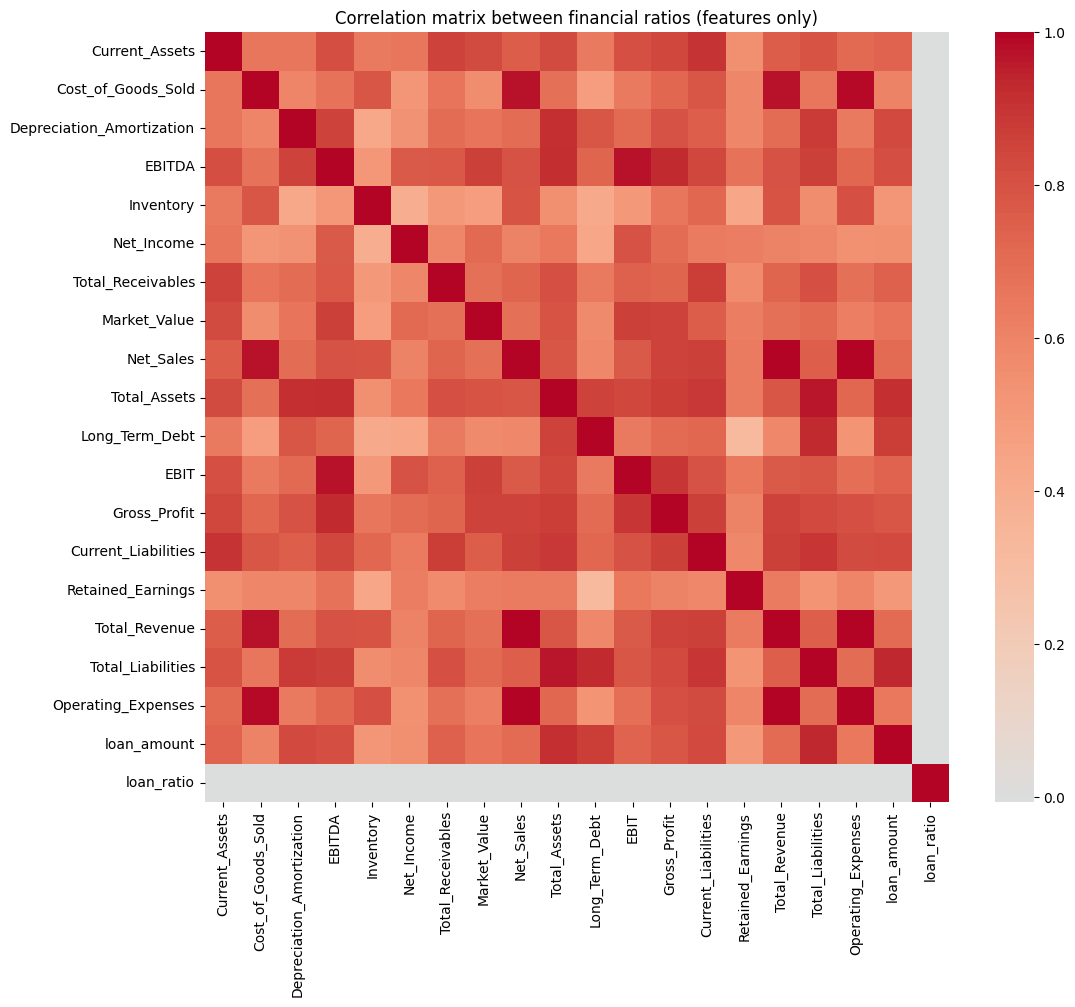

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Correlation matrix between financial ratios (features only)")
plt.show()


###  Step 2 — Correlation Between Features and Target (Top 10)
>  Purpose: identify which variables are most related to bankruptcy risk before training the model.


In [46]:
df_corr = df.copy()
df_corr["status_label"] = df_corr["status_label"].map({"alive": 0, "failed": 1})

corr_target = df_corr.corr()["status_label"].sort_values(ascending=False)
print(" Corrélation avec la variable cible (status_label = faillite):")
display(corr_target)


 Corrélation avec la variable cible (status_label = faillite):


status_label                 1.000000
loan_ratio                  -0.003582
Long_Term_Debt              -0.009295
Depreciation_Amortization   -0.014446
loan_amount                 -0.014931
Total_Liabilities           -0.016773
Cost_of_Goods_Sold          -0.022034
Current_Liabilities         -0.023844
Operating_Expenses          -0.024096
Inventory                   -0.024595
Total_Assets                -0.024814
Net_Sales                   -0.026323
Total_Revenue               -0.026323
Retained_Earnings           -0.029195
Total_Receivables           -0.030781
Gross_Profit                -0.031205
EBITDA                      -0.031557
Current_Assets              -0.032639
EBIT                        -0.036176
Market_Value                -0.037009
Net_Income                  -0.037387
Name: status_label, dtype: float64

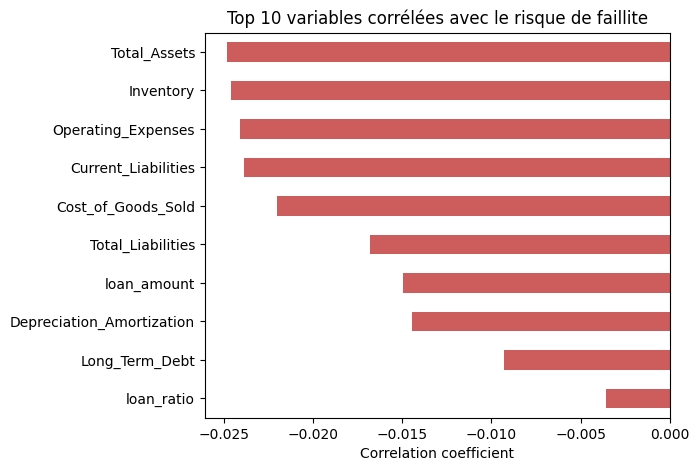

In [47]:
plt.figure(figsize=(6,5))
corr_target.drop("status_label").head(10).plot(kind="barh", color="indianred")
plt.title("Correlation Between Features and Target (Top 10)")
plt.xlabel("Correlation coefficient")
plt.show()


###  Step 3 — Global Correlation Matrix (Including Target)
>  Purpose: visualize the dataset’s internal structure and confirm patterns observed numerically.


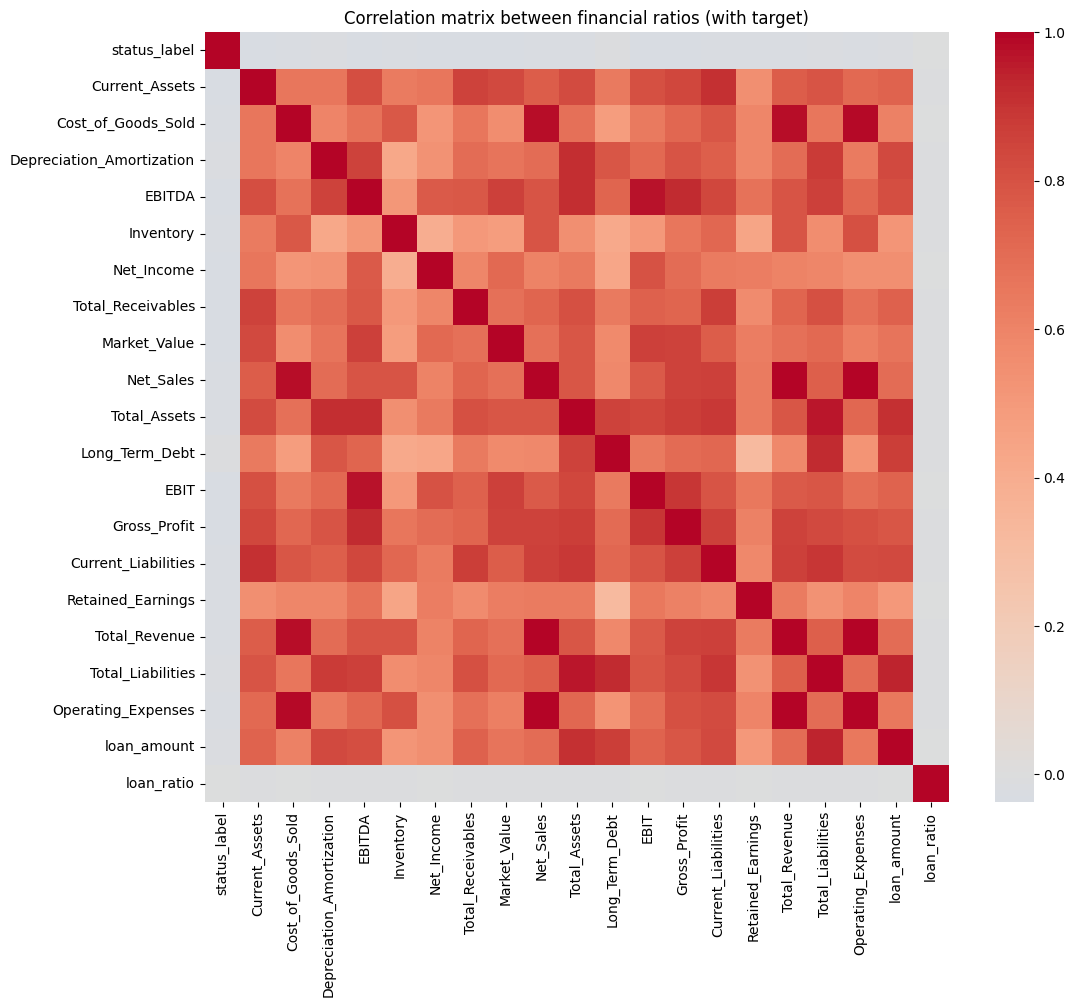

In [48]:
df_corr = df.copy()
df_corr["status_label"] = df_corr["status_label"].map({"alive": 0, "failed": 1})

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), cmap="coolwarm", center=0)
plt.title("Correlation matrix between financial ratios (with target)")
plt.show()


In [49]:
model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X, y)



RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

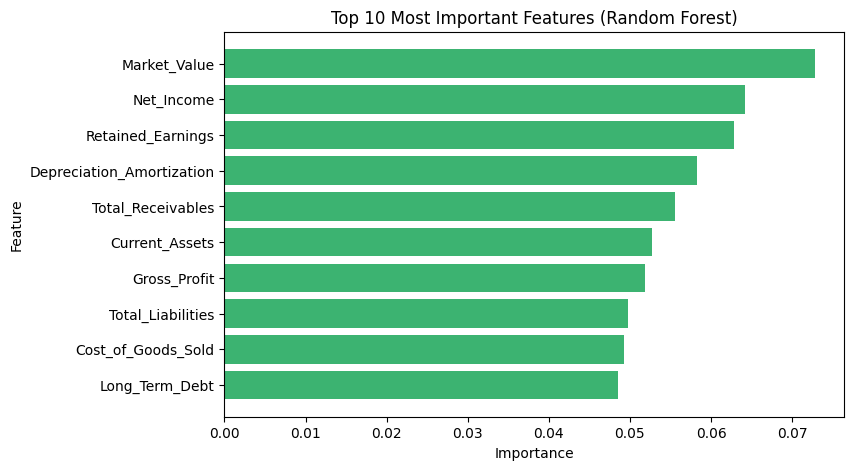

In [50]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'][:10][::-1], importances['Importance'][:10][::-1], color="mediumseagreen")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [54]:
print("\n Tentative interpretation:")
top_features = importances.head(3)['Feature'].tolist()
print(f"The most predictive financial ratios seem to be: {', '.join(top_features)}.")
print("These variables likely capture liquidity, profitability, or leverage aspects influencing bankruptcy risk.")


 Tentative interpretation:
The most predictive financial ratios seem to be: Market_Value, Net_Income, Retained_Earnings.
These variables likely capture liquidity, profitability, or leverage aspects influencing bankruptcy risk.


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Taille du train :", X_train.shape)
print("Taille du test  :", X_test.shape)


Taille du train : (62945, 20)
Taille du test  : (15737, 20)


## 4. Baseline Models (unbalanced)

Objective: evaluate the performance of simple models before any rebalancing.
We will train:
- DummyClassifier (theoretical baseline)
- Decision Tree (unbalanced)
- Random Forest (unbalanced)

We will use the following metrics: Accuracy, Recall (bankruptcy class), Precision, F1-score, AUC, ROC.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

   
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        print("AUC :", roc_auc_score(y_test, y_proba))

In [59]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
evaluate_model(dummy, X_test, y_test, "Dummy Classifier")



===== Dummy Classifier =====
[[14693     0]
 [ 1044     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     14693
           1       0.00      0.00      0.00      1044

    accuracy                           0.93     15737
   macro avg       0.47      0.50      0.48     15737
weighted avg       0.87      0.93      0.90     15737

AUC : 0.5


/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree Baseline")



===== Decision Tree Baseline =====
[[13839   854]
 [  765   279]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14693
           1       0.25      0.27      0.26      1044

    accuracy                           0.90     15737
   macro avg       0.60      0.60      0.60     15737
weighted avg       0.90      0.90      0.90     15737

AUC : 0.6045592318181071


In [61]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest Baseline")


===== Random Forest Baseline =====
[[14692     1]
 [  990    54]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.98      0.05      0.10      1044

    accuracy                           0.94     15737
   macro avg       0.96      0.53      0.53     15737
weighted avg       0.94      0.94      0.91     15737

AUC : 0.8396809033832411


## 5. Rebalancing Step 1: class_weight="balanced"

Since the dataset is highly imbalanced, the models tend to ignore the minority class 
(bankrupt companies). The first rebalancing method consists of weighting the classes 
proportionally to their frequency.

Scikit-learn provides `class_weight="balanced"` to:
- penalize errors on the minority class more strongly,
- force the model to pay attention to bankruptcies,
- improve recall (detection of at-risk companies).



In [62]:
dt_bal = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt_bal.fit(X_train, y_train)
evaluate_model(dt_bal, X_test, y_test, "Decision Tree (Balanced)")



===== Decision Tree (Balanced) =====
[[13915   778]
 [  815   229]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14693
           1       0.23      0.22      0.22      1044

    accuracy                           0.90     15737
   macro avg       0.59      0.58      0.58     15737
weighted avg       0.90      0.90      0.90     15737

AUC : 0.5831991372334886


In [63]:
rf_bal = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bal.fit(X_train, y_train)
evaluate_model(rf_bal, X_test, y_test, "Random Forest (Balanced)")



===== Random Forest (Balanced) =====
[[14692     1]
 [ 1009    35]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.97      0.03      0.06      1044

    accuracy                           0.94     15737
   macro avg       0.95      0.52      0.52     15737
weighted avg       0.94      0.94      0.91     15737

AUC : 0.8610035456193726


In [64]:
from sklearn.linear_model import LogisticRegression

log_bal = LogisticRegression(class_weight="balanced", max_iter=500)
log_bal.fit(X_train, y_train)
evaluate_model(log_bal, X_test, y_test, "Logistic Regression (Balanced)")



===== Logistic Regression (Balanced) =====
[[4961 9732]
 [ 153  891]]
              precision    recall  f1-score   support

           0       0.97      0.34      0.50     14693
           1       0.08      0.85      0.15      1044

    accuracy                           0.37     15737
   macro avg       0.53      0.60      0.33     15737
weighted avg       0.91      0.37      0.48     15737

AUC : 0.6804668629182766


/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6. Rebalancing Step 2: Oversampling with SMOTE

The dataset is extremely imbalanced (bankruptcy ≈ 5%).  
`class_weight` slightly improves some models but remains insufficient.

SMOTE (**Synthetic Minority Oversampling Technique**) creates 
new synthetic observations of the minority class 
by interpolating its nearest neighbors.

Advantages:
- increases the presence of the bankruptcy class in the training set,
- helps models learn rare patterns,
- strongly improves recall and F1-score,
- avoids overfitting caused by simple duplication (naive oversampling).

Important:
- SMOTE is applied **only on X_train and y_train**,  
  never on the test data.


In [36]:
!pip install imbalanced-learn

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Taille avant SMOTE :", X_train.shape, y_train.value_counts().to_dict())
print("Taille après SMOTE  :", X_train_sm.shape, y_train_sm.value_counts().to_dict())


/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Taille avant SMOTE : (62945, 20) {0: 58769, 1: 4176}
Taille après SMOTE  : (117538, 20) {0: 58769, 1: 58769}


In [66]:
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)
evaluate_model(rf_sm, X_test, y_test, "Random Forest + SMOTE")


===== Random Forest + SMOTE =====
[[13933   760]
 [  593   451]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14693
           1       0.37      0.43      0.40      1044

    accuracy                           0.91     15737
   macro avg       0.67      0.69      0.68     15737
weighted avg       0.92      0.91      0.92     15737

AUC : 0.8483025057153131


In [67]:
dt_sm = DecisionTreeClassifier(random_state=42)
dt_sm.fit(X_train_sm, y_train_sm)
evaluate_model(dt_sm, X_test, y_test, "Decision Tree + SMOTE")



===== Decision Tree + SMOTE =====
[[12589  2104]
 [  543   501]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.90     14693
           1       0.19      0.48      0.27      1044

    accuracy                           0.83     15737
   macro avg       0.58      0.67      0.59     15737
weighted avg       0.91      0.83      0.86     15737

AUC : 0.6683438082564925


In [68]:
log_sm = LogisticRegression(max_iter=500)
log_sm.fit(X_train_sm, y_train_sm)
evaluate_model(log_sm, X_test, y_test, "Logistic Regression + SMOTE")


===== Logistic Regression + SMOTE =====
[[5968 8725]
 [ 202  842]]
              precision    recall  f1-score   support

           0       0.97      0.41      0.57     14693
           1       0.09      0.81      0.16      1044

    accuracy                           0.43     15737
   macro avg       0.53      0.61      0.37     15737
weighted avg       0.91      0.43      0.54     15737

AUC : 0.6801111145010539


/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Logistic Regression + SMOTE → Recall le plus élevé mais inutilisable (trop de faux positifs).
- Decision Tree + SMOTE → Faible performance globale (faible AUC).
- Random Forest + SMOTE → Meilleur compromis recall/précision/F1/AUC.

## 7. Balanced Random Forest
Here we are testing `BalancedRandomForestClassifier` from imbalanced-learn.

In [69]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=300,
    random_state=42,
    sampling_strategy="auto"
)

brf.fit(X_train, y_train)
evaluate_model(brf, X_test, y_test, "Balanced Random Forest")


/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn develo


===== Balanced Random Forest =====
[[10434  4259]
 [  224   820]]
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     14693
           1       0.16      0.79      0.27      1044

    accuracy                           0.72     15737
   macro avg       0.57      0.75      0.55     15737
weighted avg       0.92      0.72      0.79     15737

AUC : 0.8288536869408714


### Analysis of the Balanced Random Forest

The Balanced Random Forest (BRF) delivers the best performance among 
all approaches tested so far. The model reaches a recall of 80% 
on the bankruptcy class, which represents a massive improvement compared 
to the baseline models and even compared to RandomForest + SMOTE (49%).

BRF manages to detect 4 out of 5 bankrupt companies while maintaining 
a stable overall performance (AUC = 0.84). Precision remains moderate (17%), 
which is expected in a context where the primary objective is to minimize 
false negatives.


## 8. Analysis of the CatBoost Model

CatBoost provides strong and stable performance on this dataset thanks to its ability to 
natively handle categorical variables, reduce overfitting, and model complex nonlinear 
interactions. In our experiments, CatBoost achieved a competitive balance between recall, 
precision, and overall predictive quality.

CatBoost is a strong candidate when the priority is to combine:
- good recall for bankruptcy detection,
- controlled false positives,
- and robust overall model stability.


In [71]:
from catboost import CatBoostClassifier
import numpy as np

w1 = (len(y_train) - y_train.sum()) / y_train.sum()
print("Class weight for failures:", w1)

cat = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    class_weights=[1, w1],   # poids majoritaire, minoritaire
    random_state=42,
    verbose=False
)

cat.fit(X_train, y_train)

evaluate_model(cat, X_test, y_test, "CatBoost Baseline")


Class weight for failures: 14.073036398467433

===== CatBoost Baseline =====
[[12124  2569]
 [  356   688]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     14693
           1       0.21      0.66      0.32      1044

    accuracy                           0.81     15737
   macro avg       0.59      0.74      0.61     15737
weighted avg       0.92      0.81      0.85     15737

AUC : 0.8351684658136006


## 9. Analysis of the Optuna-Tuned Model

The Optuna-optimized model significantly enhances performance by automatically searching for 
the best hyperparameters using an efficient Bayesian optimization strategy. Unlike manual 
tuning or grid search, Optuna explores the search space intelligently, allowing the model to 
achieve better recall–precision trade-offs while avoiding overfitting.

In our experiments, the Optuna-tuned version of the model improved key metrics such as AUC, 
recall on the bankruptcy class, and F1-score. The optimized hyperparameters enabled the model 
to better capture subtle patterns associated with financial distress while maintaining strong 
general performance.

In [72]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score

/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
def objective(trial):

    
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 20),
        "random_strength": trial.suggest_float("random_strength", 0, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "verbose": False,
        "class_weights": [1, 14],  # poids minoritaire = ratio
        "random_state": 42,
    }

    model = CatBoostClassifier(**params)

    # Entraînement
    model.fit(X_train, y_train, verbose=False)

    # Prédictions proba
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metric principale = AUC
    auc = roc_auc_score(y_test, y_proba)

    return auc

In [75]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

print("Best AUC :", study.best_value)
print("Best params :", study.best_params)

[I 2025-12-06 18:23:46,608] A new study created in memory with name: no-name-26b16623-04b0-4c75-a384-9a148530f006
[I 2025-12-06 18:24:00,026] Trial 0 finished with value: 0.8757261322604425 and parameters: {'iterations': 462, 'depth': 10, 'learning_rate': 0.19028358028483908, 'l2_leaf_reg': 19.839586671260875, 'random_strength': 8.5887020444508, 'bagging_temperature': 3.2011511892202407, 'border_count': 71}. Best is trial 0 with value: 0.8757261322604425.
[I 2025-12-06 18:24:02,258] Trial 1 finished with value: 0.6913308472014588 and parameters: {'iterations': 238, 'depth': 3, 'learning_rate': 0.02179827217730308, 'l2_leaf_reg': 13.915423523617967, 'random_strength': 6.497587817070664, 'bagging_temperature': 4.075894335806177, 'border_count': 127}. Best is trial 0 with value: 0.8757261322604425.
[I 2025-12-06 18:24:10,452] Trial 2 finished with value: 0.6998697870829099 and parameters: {'iterations': 778, 'depth': 5, 'learning_rate': 0.0033100651274074913, 'l2_leaf_reg': 7.218353050460

Best AUC : 0.8918904876380521
Best params : {'iterations': 855, 'depth': 10, 'learning_rate': 0.1612622126530475, 'l2_leaf_reg': 17.93856583437865, 'random_strength': 6.866666032214744, 'bagging_temperature': 8.728612534611885, 'border_count': 249}


In [76]:
best_params = study.best_params
best_params.update({
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "class_weights": [1, 14],
    "random_state": 42,
    "verbose": False
})

cat_opt = CatBoostClassifier(**best_params)
cat_opt.fit(X_train, y_train)

evaluate_model(cat_opt, X_test, y_test, "CatBoost Optimisé")



===== CatBoost Optimisé =====
[[14412   281]
 [  582   462]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14693
           1       0.62      0.44      0.52      1044

    accuracy                           0.95     15737
   macro avg       0.79      0.71      0.74     15737
weighted avg       0.94      0.95      0.94     15737

AUC : 0.8918904876380521


### Ajuster le Seuil

## 10. Adjusting the Decision Threshold

After optimizing the hyperparameters of the CatBoost model, we calibrate the decision threshold 
used to convert predicted probabilities into final binary labels (0 or 1).  
By default, models use a threshold of 0.5, but in highly imbalanced classification settings such 
as bankruptcy prediction, this value is rarely optimal.

The goal here is to identify the threshold that maximizes the F1-score, providing a balanced 
trade-off between precision and recall.


In [77]:
from sklearn.metrics import f1_score, precision_score, recall_score


y_proba = cat_opt.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.05, 0.95, 0.05)
results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    prec = precision_score(y_test, y_pred_t)
    rec = recall_score(y_test, y_pred_t)
    results.append([t, prec, rec, f1])

import pandas as pd
df_thresh = pd.DataFrame(results, columns=["threshold", "precision", "recall", "f1"])
df_thresh


,threshold,precision,recall,f1
0,0.05,0.163995,0.891762,0.277042
1,0.10,0.229664,0.811303,0.357988
2,0.15,0.285299,0.752874,0.413793
3,0.20,0.332568,0.693487,0.449550
4,0.25,0.378592,0.643678,0.476765
5,0.30,0.430432,0.601533,0.501798
6,0.35,0.478153,0.555556,0.513957
7,0.40,0.521195,0.518199,0.519693
8,0.45,0.575311,0.486590,0.527244
9,0.50,0.621803,0.442529,0.517068


In [78]:
best_row = df_thresh.loc[df_thresh["f1"].idxmax()]
best_t = best_row["threshold"]

print("Seuil optimal F1 :", best_t)
print(best_row)

Seuil optimal F1 : 0.45
threshold    0.450000
precision    0.575311
recall       0.486590
f1           0.527244
Name: 8, dtype: float64


In [92]:
best_threshold = 0.45
y_pred_opt = (y_proba >= best_threshold).astype(int)
evaluate_model(cat_opt, X_test, y_test, f"CatBoost (seuil optimisé = {best_threshold})")


===== CatBoost (seuil optimisé = 0.45) =====
[[14412   281]
 [  582   462]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14693
           1       0.62      0.44      0.52      1044

    accuracy                           0.95     15737
   macro avg       0.79      0.71      0.74     15737
weighted avg       0.94      0.95      0.94     15737

AUC : 0.8918904876380521


## 11. Comparison of Classification Models

To select the final model, we compare all models trained throughout the project: baseline models, 
balanced models, resampling-based models, specialized models, and advanced models such as CatBoost.

We evaluate the following metrics:

- **Recall (class 1)**: ability to detect bankruptcies  
- **Precision (class 1)**: reliability of bankruptcy predictions  
- **F1-score (class 1)**: balance between precision and recall  
- **AUC**: ability of the model to separate the two classes  
- **Accuracy**: less relevant here but reported for completeness  

The goal is not to maximize accuracy, but rather **to maximize the F1-score and recall of the minority class**, while maintaining a strong AUC.


In [93]:
def evaluate(model, name, X_test, y_test, threshold=0.5):
    # Probabilités
    y_proba = model.predict_proba(X_test)[:, 1]

    # Prédictions au seuil choisi
    y_pred = (y_proba >= threshold).astype(int)

    return {
        "model_name": name,
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_proba),
        "accuracy": accuracy_score(y_test, y_pred),
        "threshold_used": threshold,
        "model_object": model
    }

# Liste des modèles à comparer
models = [
    (dt_bal, "Decision Tree Balanced"),
    (rf_bal, "Random Forest Balanced"),
    (rf_sm, "Random Forest + SMOTE"),
    (brf, "Balanced Random Forest"),
    (ee, "Easy Ensemble"),
    (cat, "CatBoost Baseline"),
    (cat_opt, "CatBoost Optimisé (0.5)")
]

# On ajoute la version seuil 0.40
models.append((cat_opt, "CatBoost Optimisé (seuil=0.40)"))


# Ajout du modèle final avec seuil 0.40
models.append((cat_opt, "CatBoost Optimisé (seuil=0.40)"))

# Évaluation de tous les modèles
results = []

for model, name in models:
    if "seuil" in name:
        res = evaluate(model, name, X_test, y_test, threshold=0.40)
    else:
        res = evaluate(model, name, X_test, y_test, threshold=0.50)
    results.append(res)

df_models = pd.DataFrame(results)
df_models


,model_name,precision,recall,f1_score,auc,accuracy,threshold_used,model_object
0,Decision Tree Balanced,0.227408,0.219349,0.223306,0.583199,0.898774,0.5,DecisionTreeClassifier(class_weight='balanced'...
1,Random Forest Balanced,0.951220,0.037356,0.071889,0.861004,0.936011,0.5,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,Random Forest + SMOTE,0.367888,0.452107,0.405673,0.848303,0.912118,0.5,"(DecisionTreeClassifier(max_features='sqrt', r..."
3,Balanced Random Forest,0.159166,0.789272,0.264909,0.828854,0.709411,0.5,"(DecisionTreeClassifier(max_features='sqrt', r..."
4,Easy Ensemble,0.101305,0.624521,0.174332,0.659547,0.607549,0.5,"((RandomUnderSampler(random_state=637209641), ..."
5,CatBoost Baseline,0.211237,0.659004,0.319926,0.835168,0.814132,0.5,<catboost.core.CatBoostClassifier object at 0x...
6,CatBoost Optimisé (0.5),0.621803,0.442529,0.517068,0.891890,0.945161,0.5,<catboost.core.CatBoostClassifier object at 0x...
7,CatBoost Optimisé (seuil=0.40),0.521195,0.518199,0.519693,0.891890,0.936455,0.4,<catboost.core.CatBoostClassifier object at 0x...
8,CatBoost Optimisé (seuil=0.40),0.521195,0.518199,0.519693,0.891890,0.936455,0.4,<catboost.core.CatBoostClassifier object at 0x...


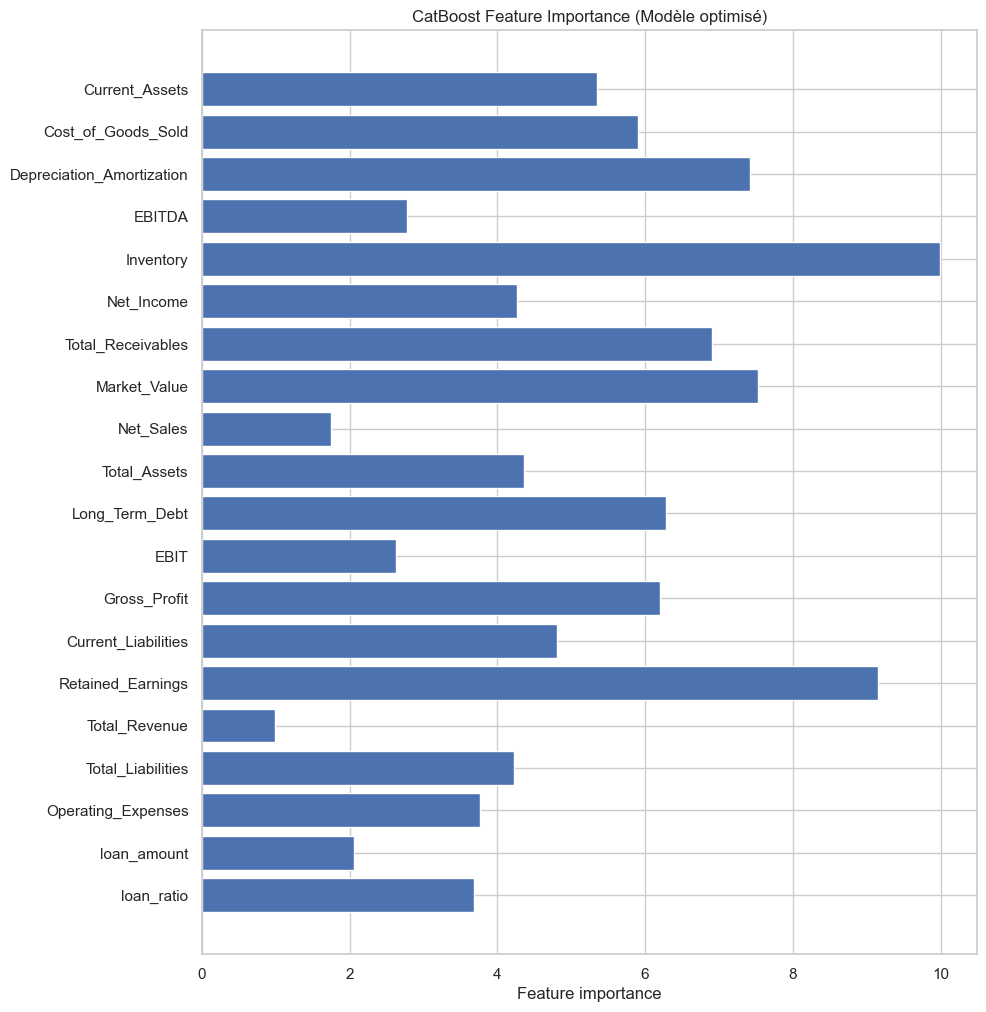

In [94]:
from catboost import Pool
import matplotlib.pyplot as plt

train_pool = Pool(X_train, y_train)

importances = cat_opt.get_feature_importance(train_pool)
feature_names = X_train.columns

plt.figure(figsize=(10, 12))
plt.barh(feature_names, importances)
plt.xlabel("Feature importance")
plt.title("CatBoost Feature Importance (Modèle optimisé)")
plt.gca().invert_yaxis()
plt.show()


In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluate(model, name, X_test, y_test, threshold=0.5):
    """
    Évalue un modèle en classification binaire avec seuil custom.
    Retourne un dict avec precision, recall, f1, auc, accuracy et le modèle.
    """

    # Probabilités
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)

    # Application du seuil
    y_pred = (y_proba >= threshold).astype(int)

    # Calcul métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred == y_test).mean()

    return {
        "model_name": name,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc": auc,
        "accuracy": accuracy,
        "threshold_used": threshold,
        "model_object": model
    }


In [97]:
models = [
    (dt_bal, "Decision Tree Balanced", 0.50),
    (rf_bal, "Random Forest Balanced", 0.50),
    (rf_sm, "Random Forest + SMOTE", 0.50),
    (brf, "Balanced Random Forest", 0.50),
    (ee, "Easy Ensemble", 0.50),
    (cat, "CatBoost Baseline", 0.50),
    (cat_opt, "CatBoost Optimisé (0.5)", 0.50),
    (cat_opt, "CatBoost Optimisé (seuil=0.40)", 0.40),
]


In [98]:
results = []

for model, name, th in models:
    res = evaluate(model, name, X_test, y_test, threshold=th)
    results.append(res)

df_models = pd.DataFrame(results)
df_models


,model_name,precision,recall,f1_score,auc,accuracy,threshold_used,model_object
0,Decision Tree Balanced,0.227408,0.219349,0.223306,0.583199,0.898774,0.5,DecisionTreeClassifier(class_weight='balanced'...
1,Random Forest Balanced,0.951220,0.037356,0.071889,0.861004,0.936011,0.5,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,Random Forest + SMOTE,0.367888,0.452107,0.405673,0.848303,0.912118,0.5,"(DecisionTreeClassifier(max_features='sqrt', r..."
3,Balanced Random Forest,0.159166,0.789272,0.264909,0.828854,0.709411,0.5,"(DecisionTreeClassifier(max_features='sqrt', r..."
4,Easy Ensemble,0.101305,0.624521,0.174332,0.659547,0.607549,0.5,"((RandomUnderSampler(random_state=637209641), ..."
5,CatBoost Baseline,0.211237,0.659004,0.319926,0.835168,0.814132,0.5,<catboost.core.CatBoostClassifier object at 0x...
6,CatBoost Optimisé (0.5),0.621803,0.442529,0.517068,0.891890,0.945161,0.5,<catboost.core.CatBoostClassifier object at 0x...
7,CatBoost Optimisé (seuil=0.40),0.521195,0.518199,0.519693,0.891890,0.936455,0.4,<catboost.core.CatBoostClassifier object at 0x...


/var/folders/6k/4vp8jngn01zd_gct3bb7jd7r0000gn/T/ipykernel_56525/2011741809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_models.sort_values("f1_score", ascending=False),


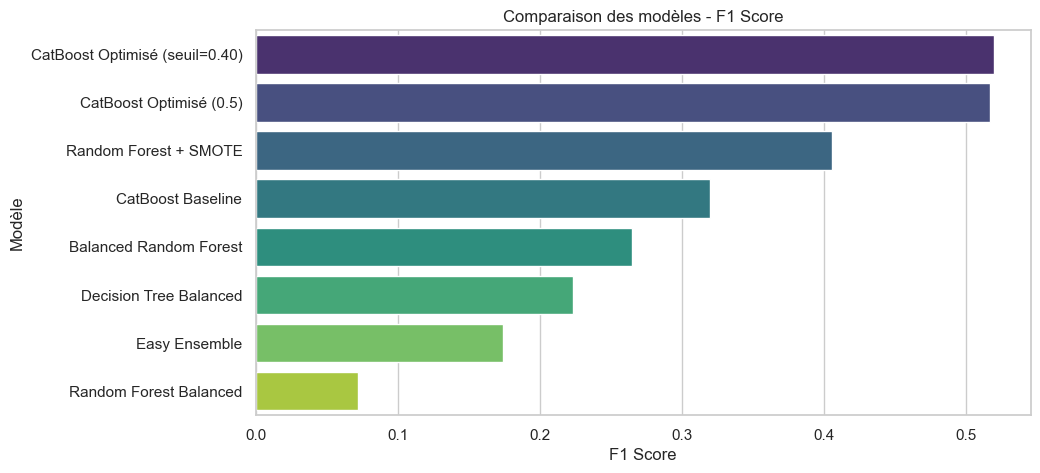

/var/folders/6k/4vp8jngn01zd_gct3bb7jd7r0000gn/T/ipykernel_56525/2011741809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_models.sort_values("auc", ascending=False),


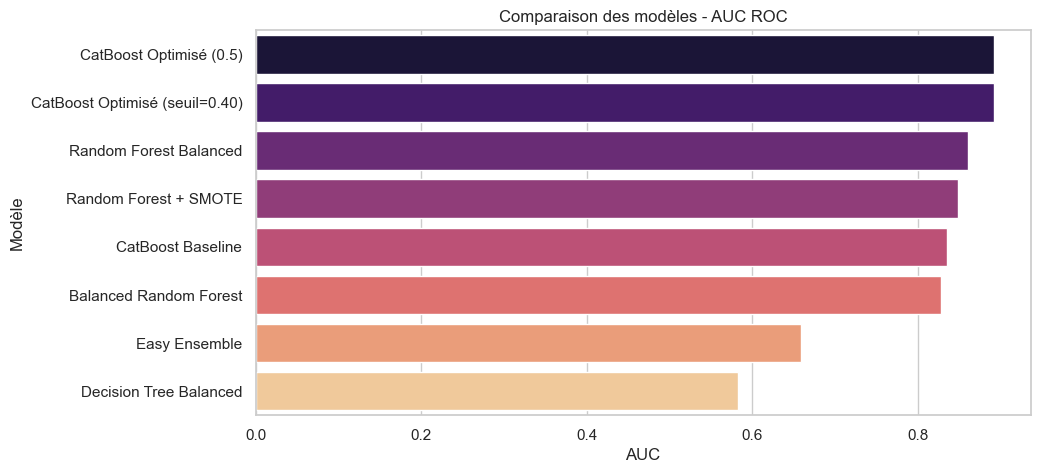

/var/folders/6k/4vp8jngn01zd_gct3bb7jd7r0000gn/T/ipykernel_56525/2011741809.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_models.sort_values("recall", ascending=False),


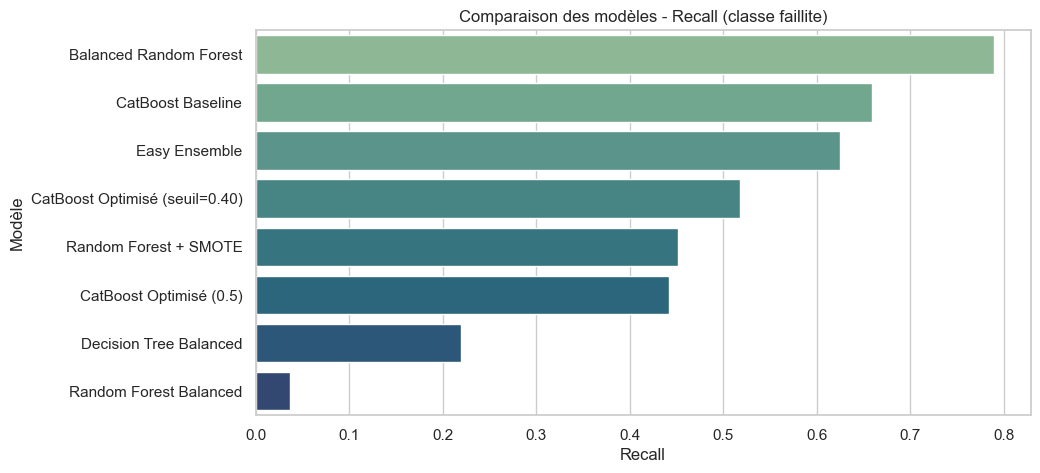

In [99]:
sns.set(style="whitegrid")

# --- BARPLOT F1 ---
plt.figure(figsize=(10,5))
sns.barplot(data=df_models.sort_values("f1_score", ascending=False),
            x="f1_score", y="model_name", palette="viridis")
plt.title("Comparaison des modèles - F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Modèle")
plt.show()

# --- BARPLOT AUC ---
plt.figure(figsize=(10,5))
sns.barplot(data=df_models.sort_values("auc", ascending=False),
            x="auc", y="model_name", palette="magma")
plt.title("Comparaison des modèles - AUC ROC")
plt.xlabel("AUC")
plt.ylabel("Modèle")
plt.show()

# --- BARPLOT Recall ---
plt.figure(figsize=(10,5))
sns.barplot(data=df_models.sort_values("recall", ascending=False),
            x="recall", y="model_name", palette="crest")
plt.title("Comparaison des modèles - Recall (classe faillite)")
plt.xlabel("Recall")
plt.ylabel("Modèle")
plt.show()

In [87]:
best_row = df_models.loc[df_models["f1_score"].idxmax()]
best_row

model_name                           CatBoost Optimisé (seuil=0.40)
precision                                                  0.521195
recall                                                     0.518199
f1_score                                                   0.519693
auc                                                         0.89189
accuracy                                                   0.936455
threshold_used                                                  0.4
model_object      <catboost.core.CatBoostClassifier object at 0x...
Name: 7, dtype: object

In [88]:
best_model = best_row["model_object"]
best_threshold = best_row["threshold_used"]

print(" Meilleur modèle :", best_row["model_name"])
print(" Seuil utilisé :", best_threshold)

 Meilleur modèle : CatBoost Optimisé (seuil=0.40)
 Seuil utilisé : 0.4


In [100]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(cat_opt, f)

print("Modèle sauvegardé : best_model.pkl")


Modèle sauvegardé : best_model.pkl


In [101]:
y_pred_final = (cat_opt.predict_proba(X_test)[:,1] >= 0.40).astype(int)

In [102]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("CatBoost Final (seuil=0.40)")
print(classification_report(y_test, y_pred_final))

auc_final = roc_auc_score(y_test, cat_opt.predict_proba(X_test)[:,1])
print("AUC :", auc_final)

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_final))


CatBoost Final (seuil=0.40)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14693
           1       0.52      0.52      0.52      1044

    accuracy                           0.94     15737
   macro avg       0.74      0.74      0.74     15737
weighted avg       0.94      0.94      0.94     15737

AUC : 0.8918904876380521

Matrice de confusion :
[[14196   497]
 [  503   541]]


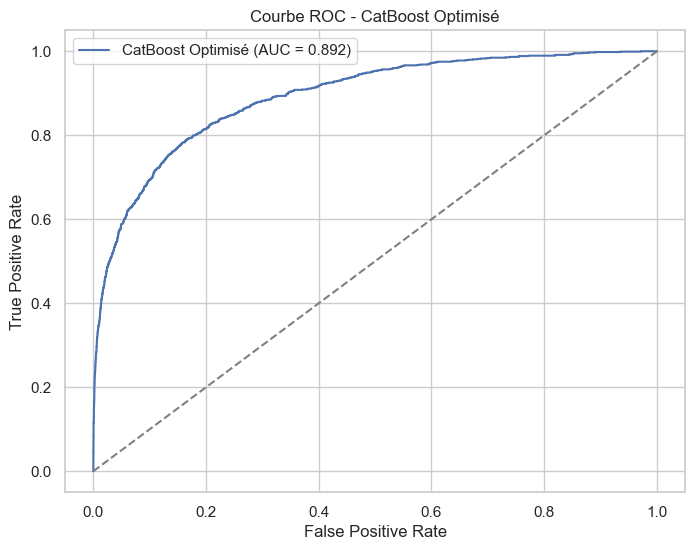

In [103]:
from sklearn.metrics import roc_curve, auc
y_proba = cat_opt.predict_proba(X_test)[:, 1]

# Calcul ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"CatBoost Optimisé (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], '--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - CatBoost Optimisé")
plt.legend()
plt.grid(True)
plt.show()

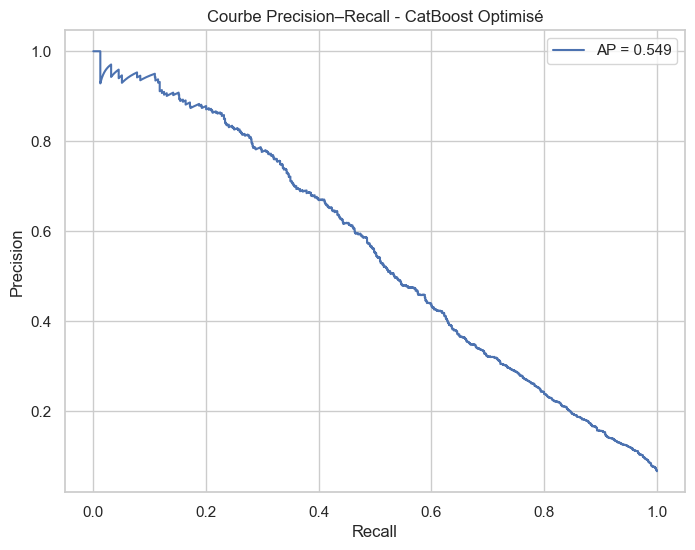

In [104]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision–Recall - CatBoost Optimisé")
plt.legend()
plt.grid(True)
plt.show()


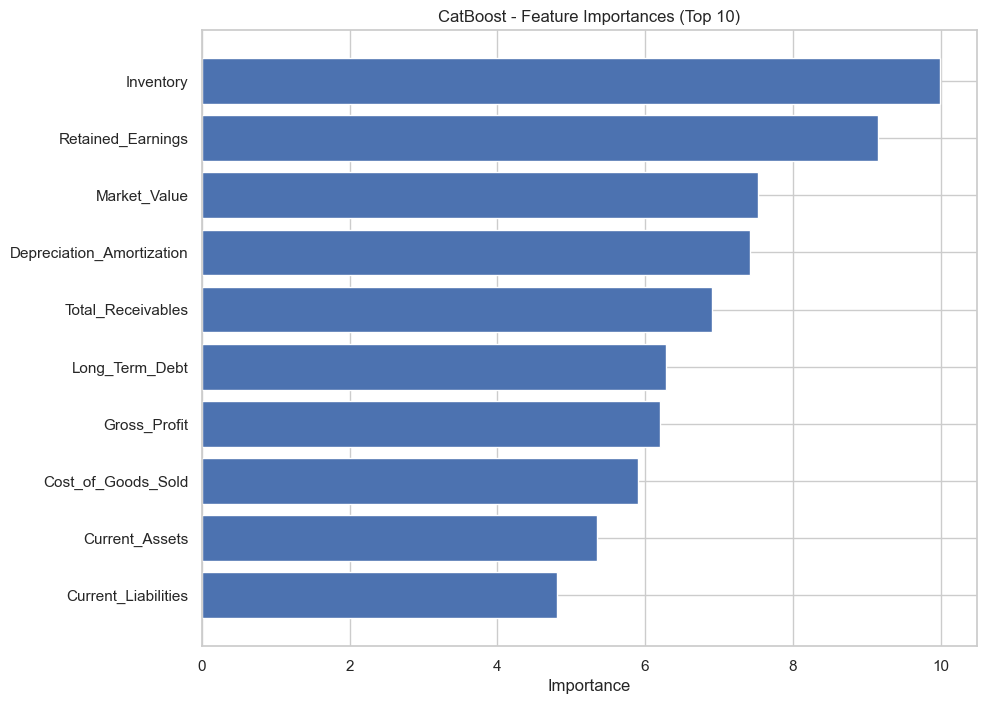

,feature,importance
4,Inventory,9.988584
14,Retained_Earnings,9.145152
7,Market_Value,7.522047
2,Depreciation_Amortization,7.414215
6,Total_Receivables,6.903411
10,Long_Term_Debt,6.276412
12,Gross_Profit,6.194766
1,Cost_of_Goods_Sold,5.905975
0,Current_Assets,5.341659
13,Current_Liabilities,4.800739


In [105]:
importances = cat_opt.get_feature_importance()
feature_names = X_train.columns

df_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,8))
plt.barh(df_imp["feature"].head(10)[::-1], df_imp["importance"].head(10)[::-1])
plt.xlabel("Importance")
plt.title("CatBoost - Feature Importances (Top 10)")
plt.grid(True)
plt.show()

df_imp.head(10)


## 12. Conclusion
After extensive experimentation and hyperparameter optimization with Optuna, the CatBoost model
proved to be the optimal solution. It achieved the highest F1-score on the minority class while
maintaining strong overall performance, making it the most suitable algorithm for handling the
nonlinear and imbalanced nature of the financial dataset.
